## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

## Load Dataset

In [2]:
data=pd.read_excel('C:\\Users\\dell\\Desktop\\GitHub\\Startup success prediction\\startup_data_new.xlsx')
data.head()

,Unnamed: 0,state_code,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,San Diego,NaN,Bandsintown,1,2007-01-01 00:00:00,NaN,2009-01-04 00:00:00,2010-01-01 00:00:00,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,Los Gatos,NaN,TriCipher,1,2000-01-01 00:00:00,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01 00:00:00,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-01-08 00:00:00,2012-01-10 00:00:00,2010-01-08 00:00:00,2012-01-04 00:00:00,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
data.shape

(923, 45)

## Explore the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   city                      923 non-null    object 
 3   Unnamed: 6                430 non-null    object 
 4   name                      923 non-null    object 
 5   labels                    923 non-null    int64  
 6   founded_at                923 non-null    object 
 7   closed_at                 335 non-null    object 
 8   first_funding_at          923 non-null    object 
 9   last_funding_at           923 non-null    object 
 10  age_first_funding_year    923 non-null    float64
 11  age_last_funding_year     923 non-null    float64
 12  age_first_milestone_year  771 non-null    float64
 13  age_last_milestone_year   771 non-null    float64
 14  relationsh

In [5]:
data.columns

Index(['Unnamed: 0', 'state_code', 'city', 'Unnamed: 6', 'name', 'labels',
       'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
# Data Numeric
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=data.select_dtypes(include=numeric)
df_num.head(4)

,Unnamed: 0,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,204,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,1001,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,738,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1


In [7]:
# Data Categorical
df_cat=data.select_dtypes(include='object')
df_cat.head(10)

,state_code,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,San Diego,NaN,Bandsintown,2007-01-01 00:00:00,NaN,2009-01-04 00:00:00,2010-01-01 00:00:00,CA,music,c:6669,acquired
1,CA,Los Gatos,NaN,TriCipher,2000-01-01 00:00:00,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01 00:00:00,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,San Francisco,San Francisco CA 94105,Inhale Digital,2010-01-08 00:00:00,2012-01-10 00:00:00,2010-01-08 00:00:00,2012-01-04 00:00:00,CA,games_video,c:65806,closed
5,CA,Mountain View,Mountain View CA 94043,Matisse Networks,2002-01-01 00:00:00,2/15/2009,7/18/2006,7/18/2006,CA,network_hosting,c:22898,closed
6,CA,Mountain View,NaN,RingCube Technologies,2005-01-01 00:00:00,NaN,9/21/2006,3/18/2010,CA,software,c:16191,acquired
7,CA,San Rafael,NaN,ClairMail,2004-01-01 00:00:00,NaN,8/24/2005,2010-04-10 00:00:00,CA,finance,c:5192,acquired
8,MA,Williamstown,Williamstown MA 1267,VoodooVox,2002-01-01 00:00:00,NaN,2005-02-08 00:00:00,2013-08-02 00:00:00,MA,mobile,c:1043,acquired
9,CA,Palo Alto,NaN,Doostang,2005-01-06 00:00:00,NaN,2007-01-02 00:00:00,2010-05-02 00:00:00,CA,web,c:498,acquired


In [8]:
# Converting the status into 1 and 0 form 
data['status'] = data.status.map({'acquired':1, 'closed':0})
data['status']

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

In [9]:
#labels and status columns check similarity
for index, row in data.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [10]:
#state_code and state_code.1 columns check similarity
for index, row in data.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [11]:
#therefor all the labels and status value are same so we can delete labels column
data.drop(["labels"], axis=1, inplace=True)
data.drop(["state_code.1"], axis=1, inplace=True)

In [12]:
col=['Unnamed: 0','Unnamed: 6','object_id']
print("col_name  "," Unique_val ")
for c in col:
    print(c,"   ",data[c].nunique()) # all unique values 

col_name    Unique_val 
Unnamed: 0     923
Unnamed: 6     252
object_id     922


In [13]:
data=data.drop(['Unnamed: 0','Unnamed: 6','object_id'],axis=1)
data.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,Bandsintown,2007-01-01 00:00:00,NaN,2009-01-04 00:00:00,2010-01-01 00:00:00,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,TriCipher,2000-01-01 00:00:00,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,Solidcore Systems,2002-01-01 00:00:00,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,Inhale Digital,2010-01-08 00:00:00,2012-01-10 00:00:00,2010-01-08 00:00:00,2012-01-04 00:00:00,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


In [14]:
data.isna().sum()

state_code                    0
city                          0
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC  

In [15]:
#Handling missing value of first and last milestone year
data[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [16]:
for i in range(0,len(data['milestones'])):
    if data['milestones'][i]==0:
        print(data['age_first_milestone_year'][i],data['age_last_milestone_year'][i])

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


In [17]:
#So we can see that for companies that do not have milestone (milestone == 0) 
# have their age_first_milestone_year and age_last_milestone_year as blank
# So we fill the null coloumns with value 0
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value="0")
print("Null value in age_first_milestone_year",data['age_first_milestone_year'].isnull().sum())
print("Null value in age_last_milestone_year",data['age_last_milestone_year'].isnull().sum())

Null value in age_first_milestone_year 0
Null value in age_last_milestone_year 0


In [18]:
#For covering the null values of 'close_at'
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at']=data['closed_at'].fillna('2013-12-31')
data['closed_at']=pd.to_datetime(data['closed_at'])

In [19]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'])
data['last_funding_at'] = pd.to_datetime(data['last_funding_at'])

In [20]:
data.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-01-04,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,Inhale Digital,2010-01-08,2012-01-10,2010-01-08,2012-01-04,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


In [21]:
data["age"] = data["closed_at"]-data["founded_at"]
data["age"]=round(data.age/np.timedelta64(1,'Y'))
data.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age
0,CA,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-01-04,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,7.0
1,CA,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,14.0
2,CA,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,5.0
3,CA,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,12.0
4,CA,San Francisco,Inhale Digital,2010-01-08,2012-01-10,2010-01-08,2012-01-04,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2.0


## Check Error data in all features of Age

In [22]:
data[['founded_at','closed_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year','age','status']].sort_values('age').head(10)

,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,age,status
88,2013-01-01,2005-01-01,0.8822,0.8822,0,0,-8.0,0
558,2013-04-16,2009-04-05,-9.0466,-9.0466,-6.0466,-3.8822,-4.0,0
73,2003-01-01,2001-01-02,1.6685,9.3370,7.3808,10.474,-2.0,1
350,2009-01-01,2009-05-18,0.3288,0.3288,-0.4192,-0.4192,0.0,0
375,2011-08-01,2012-01-01,0.3616,0.3616,0.3753,0.5425,0.0,0
304,2010-01-01,2010-01-10,0.8027,0.8027,0.0,1.411,0.0,0
280,2011-11-11,2013-01-01,0.0548,0.0548,0.0685,0.4,1.0,0
840,2013-05-02,2013-12-31,0.0000,0.0000,-1.8027,-0.0959,1.0,1
666,2008-01-01,2009-02-25,0.6685,0.6685,0.0,0.0,1.0,0
690,2012-01-08,2013-01-01,0.0000,0.6904,0.0,0.6904,1.0,0


In [23]:
# Drop Minus Age
data=data.drop(data[data.age<0].index)
data=data.drop(data[data.age_first_funding_year<0].index)
data=data.drop(data[data.age_last_funding_year<0].index)

In [24]:
data=data.drop(data[data.age_first_milestone_year.astype(int)<0].index)

In [25]:
data=data.drop(data[data.age_last_milestone_year.astype(int)<0].index)

In [26]:
data[['founded_at','closed_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year','age','status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 922
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   founded_at                861 non-null    datetime64[ns]
 1   closed_at                 861 non-null    datetime64[ns]
 2   age_first_funding_year    861 non-null    float64       
 3   age_last_funding_year     861 non-null    float64       
 4   age_first_milestone_year  861 non-null    object        
 5   age_last_milestone_year   861 non-null    object        
 6   age                       861 non-null    float64       
 7   status                    861 non-null    int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 92.8+ KB


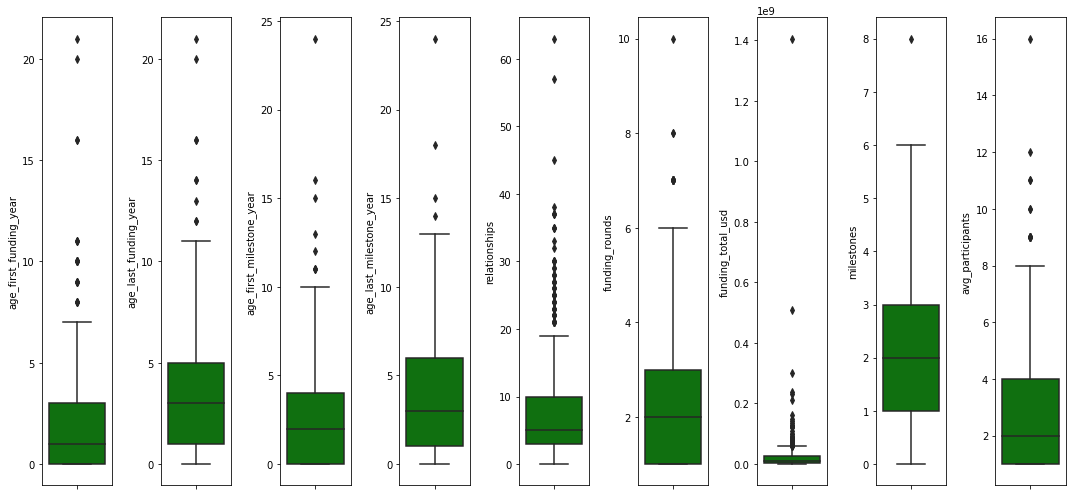

In [27]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=data[featuresNum[i]].astype(int), color='green', orient='v')
    plt.tight_layout()

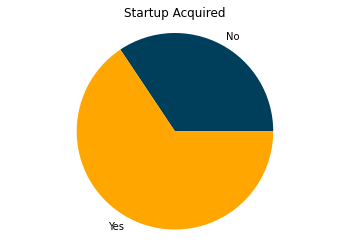

In [28]:
value_counts = data["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

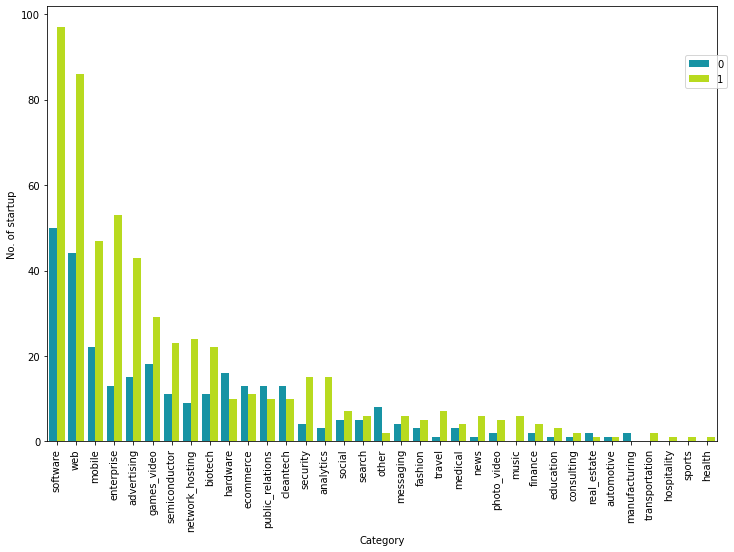

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=data, palette="nipy_spectral",
              order=data.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [30]:
data_grp_1=data[data['status']==1].groupby(['age']).agg({'status':'count'}).reset_index()
data_grp_1.columns=['age','total_succes']

data_grp_2=data.groupby(['age']).agg({'status':'count'}).reset_index()
data_grp_2.columns=['age','total']

data_grp_1=data_grp_1.merge(data_grp_2,
                           on='age')
data_grp_1['succes_rate']=round((data_grp_1['total_succes']/data_grp_1['total'])*100,2)

data_grp_1

,age,total_succes,total,succes_rate
0,1.0,1,18,5.56
1,2.0,6,30,20.00
2,3.0,15,55,27.27
3,4.0,37,68,54.41
4,5.0,51,86,59.30
5,6.0,51,79,64.56
6,7.0,61,90,67.78
7,8.0,63,84,75.00
8,9.0,72,91,79.12
9,10.0,40,51,78.43


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

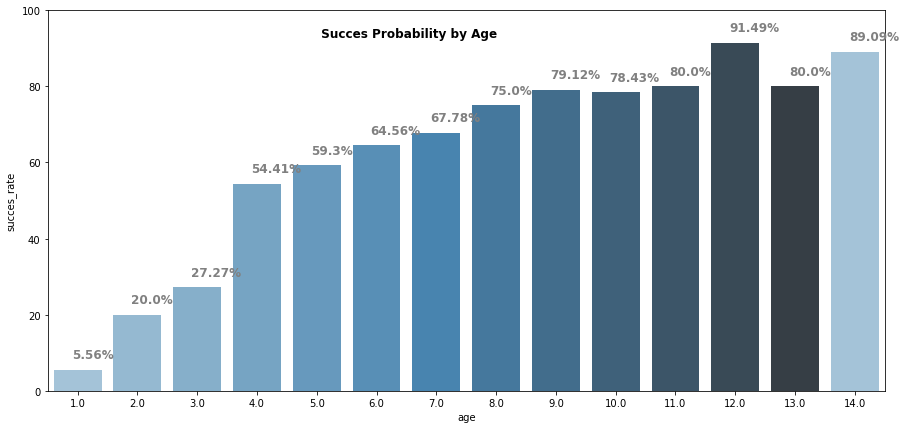

In [31]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'age',y='succes_rate',data=data_grp_1,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_1))
y = data_grp_1['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = ''' Succes Probability by Age

'''
ax.text(4,85,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    
    
ax.set_ylim(0,100)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

In [32]:
#Succes Rate by Milestones
data_grp_3=data[data['status']==1].groupby(['milestones']).agg({'status':'count'}).reset_index()
data_grp_3.columns=['milestones','total_succes']

data_grp_4=data.groupby(['milestones']).agg({'status':'count'}).reset_index()
data_grp_4.columns=['milestones','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                           on='milestones')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3


,milestones,total_succes,total,succes_rate
0,0,46,143,32.17
1,1,141,234,60.26
2,2,169,230,73.48
3,3,140,170,82.35
4,4,43,55,78.18
5,5,22,24,91.67
6,6,3,4,75.00
7,8,1,1,100.00


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

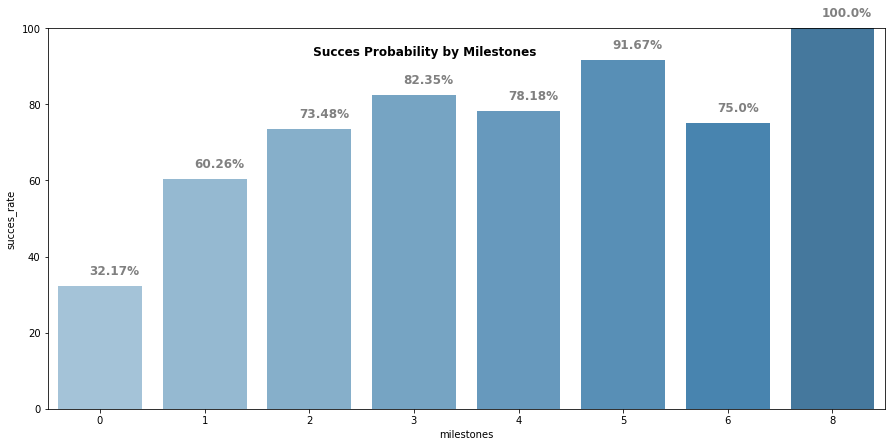

In [33]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'milestones',y='succes_rate',data=data_grp_3,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_3))
y = data_grp_3['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = ''' Succes Probability by Milestones

'''
ax.text(2,85,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
        
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

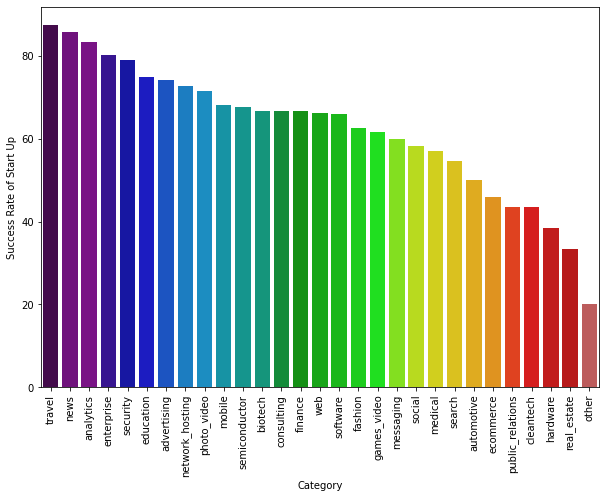

In [34]:
#Which category has the largest number Success Rate
data1 = data[data['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = data[data['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=data.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
# most_succes_rate ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

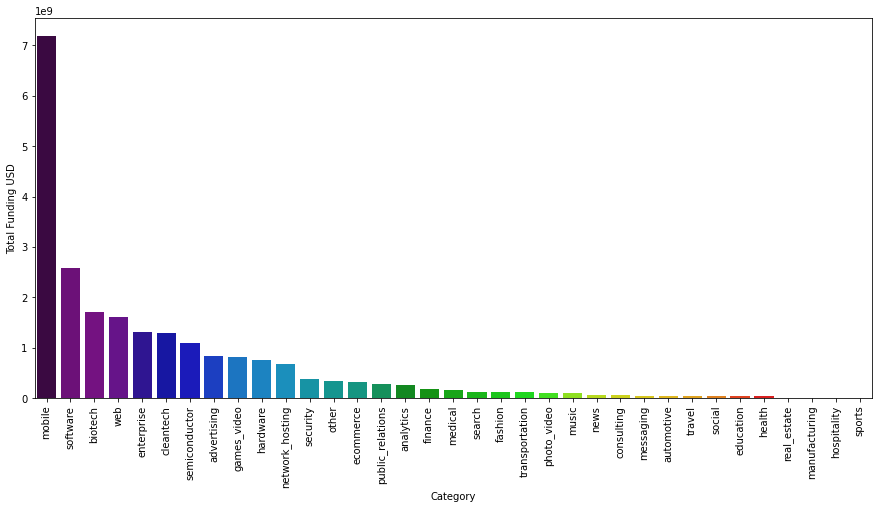

In [35]:
#Which category having most number of total funding
fig, ax = plt.subplots(figsize=(15,7))
funding_sorted_category = pd.pivot_table(data,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

In [36]:
data.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age
0,CA,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-01-04,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,7.0
1,CA,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,14.0
2,CA,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,5.0
3,CA,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,12.0
4,CA,San Francisco,Inhale Digital,2010-01-08,2012-01-10,2010-01-08,2012-01-04,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2.0


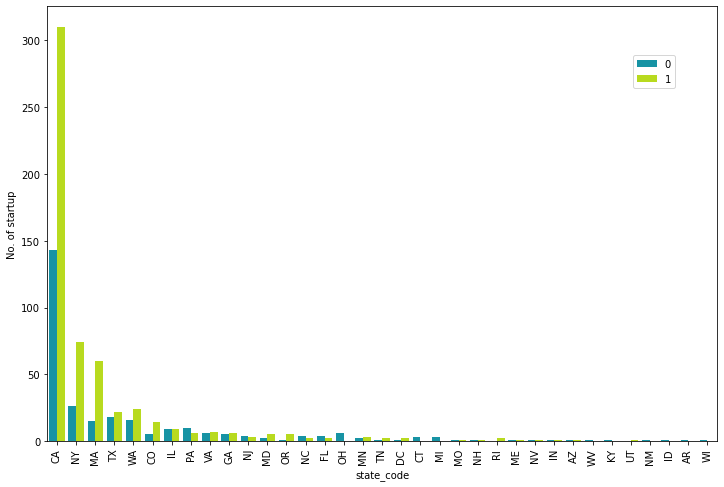

In [37]:
# Which State having most number of Startup
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=data, palette="nipy_spectral",
              order=data.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [38]:
#Which city having most number of total funding
funding_sorted_city = pd.pivot_table(data,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
89,Kirkland,5718914576
168,San Francisco,1562519129
132,New York,1152191953
123,Mountain View,894053322
175,Santa Clara,839050274
170,San Jose,732227780
13,Austin,679317317
167,San Diego,609475001
158,Redwood City,521330100
108,Loveland,510000000


<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

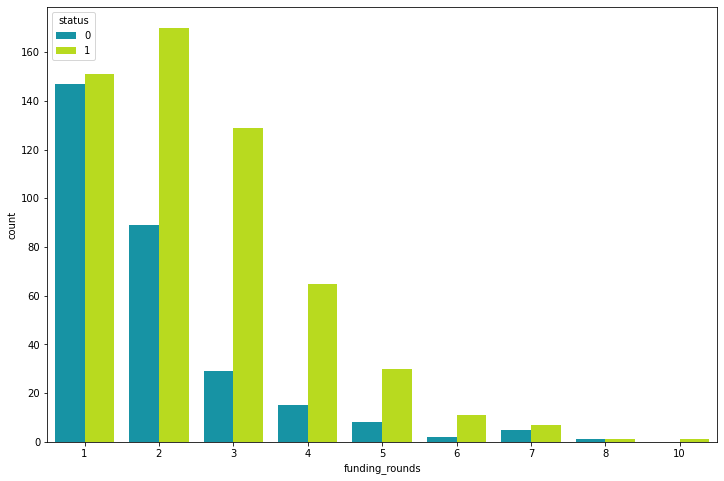

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=data, palette="nipy_spectral",
              order=data.funding_rounds.value_counts().index)

## Log Transformation & Normalization

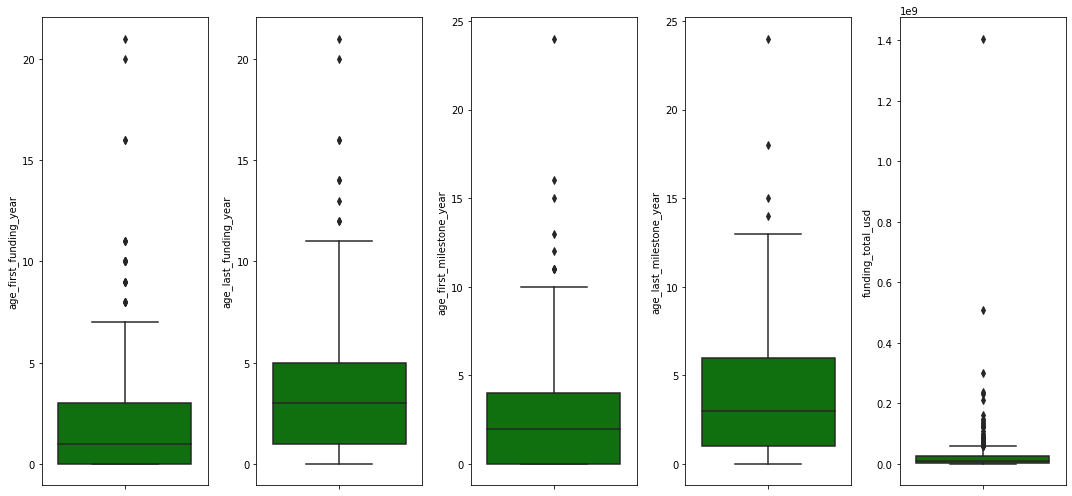

In [40]:
#Outliers
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data[featuresNumfinal[i]].astype(int), color='green', orient='v')
    plt.tight_layout()

In [41]:
#Log-transformation of the funding and milestone year variable
data["age_first_funding_year"] = np.log1p(data["age_first_funding_year"].astype(int))
data["age_last_funding_year"] = np.log1p(data["age_last_funding_year"].astype(int))
data["age_first_milestone_year"] = np.log1p(data["age_first_milestone_year"].astype(int))
data["age_last_milestone_year"] = np.log1p(data["age_last_milestone_year"].astype(int))
data["funding_total_usd"] = np.log1p(data["funding_total_usd"].astype(int))

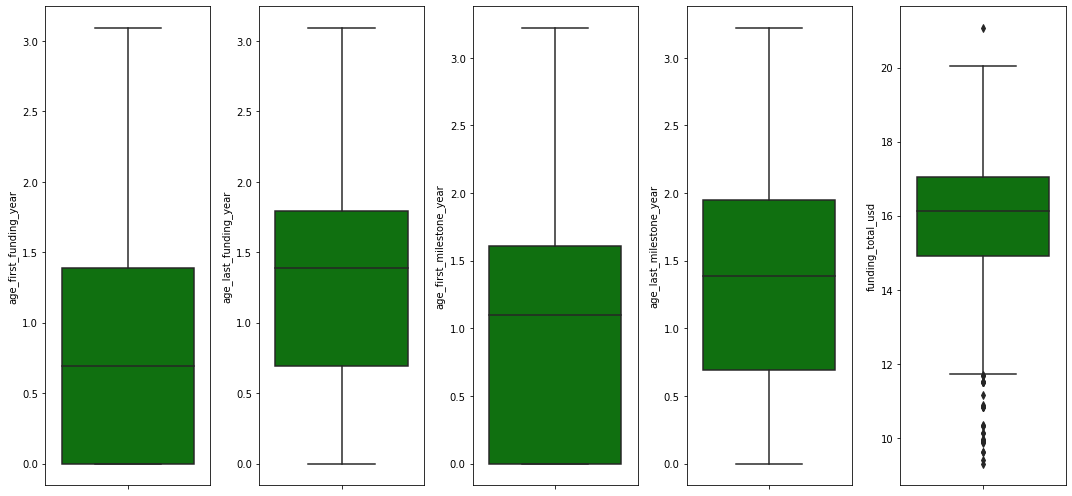

In [42]:
#log transformation to make the data symetrical to improve accuracy (remove skewness)
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

## Feature Engineering

In [43]:
data['has_RoundABCD'] = np.where((data['has_roundA'] == 1) | (data['has_roundB'] == 1) | (data['has_roundC'] == 1) | (data['has_roundD'] == 1), 1, 0)

In [44]:
data['has_Investor'] = np.where((data['has_VC'] == 1) | (data['has_angel'] == 1), 1, 0)

In [45]:
len(data[(data["has_RoundABCD"] == 1)].index)

647

In [46]:
len(data[ (data['has_RoundABCD']  == 1) & (data['status']  == 1) ].index)

467

In [47]:
len(data)

861

In [48]:
data['has_Seed'] = np.where((data['has_RoundABCD'] == 0) & (data['has_Investor'] == 1), 1, 0)

In [49]:
data['invalid_startup'] = np.where((data['has_RoundABCD'] == 0) & (data['has_VC'] == 0) & (data['has_angel'] == 0), 1, 0)

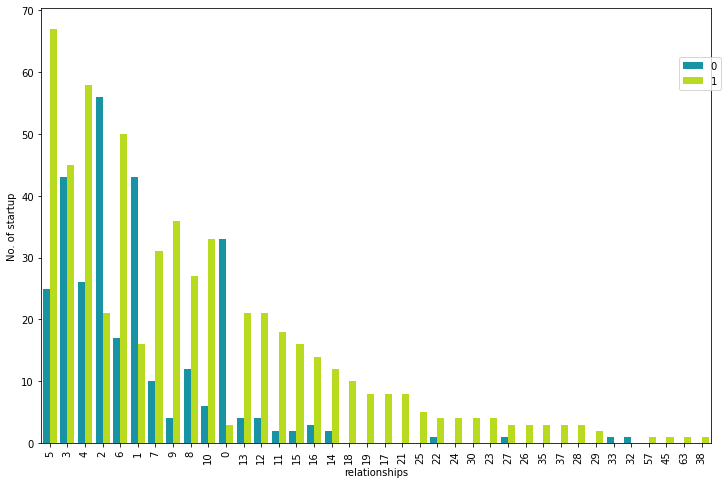

In [50]:
#New Column "tier_relationships"
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=data, palette="nipy_spectral",
              order=data.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [51]:
# create a list of our conditions
conditions = [
    (data['relationships'] <= 5),
    (data['relationships'] > 5) & (data['relationships'] <= 10),
    (data['relationships'] > 10) & (data['relationships'] <= 16),
    (data['relationships'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
data['tier_relationships'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,CA,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-01-04,2010-01-01,1.098612,1.386294,1.609438,1.945910,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,7.0,0,1,1,0,4
1,CA,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,2009-12-28,1.791759,2.302585,2.079442,2.079442,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,14.0,1,1,0,0,3
2,CA,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,2010-03-30,0.693147,0.693147,0.693147,1.098612,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,5.0,1,0,0,0,4
3,CA,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,2007-04-25,1.386294,1.791759,1.945910,1.945910,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,12.0,1,0,0,0,4
4,CA,San Francisco,Inhale Digital,2010-01-08,2012-01-10,2010-01-08,2012-01-04,0.000000,0.693147,0.000000,0.000000,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2.0,0,1,1,0,4


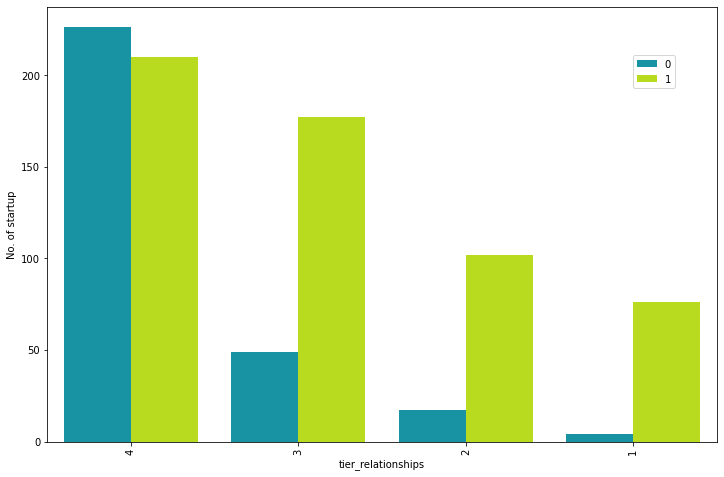

In [52]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="tier_relationships", hue="status", data=data, palette="nipy_spectral",
              order=data.tier_relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [53]:
data['tier_relationships'] = data.tier_relationships.astype(int)

In [54]:
data.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,CA,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-01-04,2010-01-01,1.098612,1.386294,1.609438,1.945910,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,7.0,0,1,1,0,4
1,CA,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,2009-12-28,1.791759,2.302585,2.079442,2.079442,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,14.0,1,1,0,0,3
2,CA,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,2010-03-30,0.693147,0.693147,0.693147,1.098612,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,5.0,1,0,0,0,4
3,CA,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,2007-04-25,1.386294,1.791759,1.945910,1.945910,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,12.0,1,0,0,0,4
4,CA,San Francisco,Inhale Digital,2010-01-08,2012-01-10,2010-01-08,2012-01-04,0.000000,0.693147,0.000000,0.000000,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,2.0,0,1,1,0,4


In [55]:
#Drop col not used for modelling
data = data.drop(['name'],axis=1)
data = data.drop(['city'],axis=1)

In [56]:
cat_feature = data.select_dtypes(include='object')
cat_feature.head()

,state_code,category_code
0,CA,music
1,CA,enterprise
2,CA,web
3,CA,software
4,CA,games_video


In [57]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=data.select_dtypes(include=numeric)
df_num.head(4)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,1.098612,1.386294,1.609438,1.945910,3,3,12.834684,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,7.0,0,1,1,0,4
1,1.791759,2.302585,2.079442,2.079442,9,4,17.506887,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,14.0,1,1,0,0,3
2,0.693147,0.693147,0.693147,1.098612,5,1,14.771022,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,5.0,1,0,0,0,4
3,1.386294,1.791759,1.945910,1.945910,5,3,17.504390,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,12.0,1,0,0,0,4


# ML Algo

In [58]:
x=data[['tier_relationships','invalid_startup','has_Investor','age','is_top500','milestones','has_RoundABCD','has_Seed']]
y=data['status']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [60]:
# lets print the shapes again 
print("Shape of the X Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", x_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (688, 8)
Shape of the y Train : (688,)
Shape of the X test : (173, 8)
Shape of the y test : (173,)


In [61]:
import lightgbm as lgb
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(x_train,y_train)
gbm.booster_.feature_importance()


# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':x.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
3,age,984
5,milestones,507
0,tier_relationships,323
2,has_Investor,287
4,is_top500,96
6,has_RoundABCD,77
7,has_Seed,51


In [62]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 85.90116279069767
Testing Accuracy : 82.65895953757226


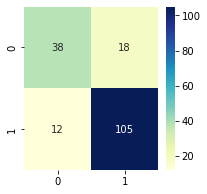

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        56
           1       0.85      0.90      0.88       117

    accuracy                           0.83       173
   macro avg       0.81      0.79      0.80       173
weighted avg       0.82      0.83      0.82       173

------------------------------------------
ROC Curves              = 0.7880036630036631
Precision-Recall Curves = 0.9102292979354871


In [63]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(feature_fraction=0.5)

clf.fit(x_train,y_train)

y_pred_lgb = clf.predict(x_test)

print("Training Accuracy :", clf.score(x_train, y_train)*100)
print("Testing Accuracy :", clf.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

Training Accuracy : 88.22674418604652
Testing Accuracy : 82.08092485549133


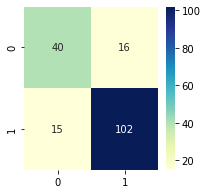

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        56
           1       0.86      0.87      0.87       117

    accuracy                           0.82       173
   macro avg       0.80      0.79      0.79       173
weighted avg       0.82      0.82      0.82       173

------------------------------------------
ROC Curves              = 0.7930402930402931
Precision-Recall Curves = 0.9114534268840137


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(x_train,y_train)

#predict
y_predicted_gb = gbc.predict(x_test)

print("Training Accuracy :", gbc.score(x_train, y_train)*100)
print("Testing Accuracy :", gbc.score(x_test, y_test)*100)

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

Training Accuracy : 90.26162790697676
Testing Accuracy : 80.34682080924856


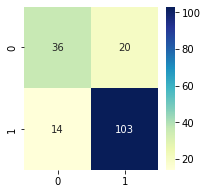

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        56
           1       0.84      0.88      0.86       117

    accuracy                           0.80       173
   macro avg       0.78      0.76      0.77       173
weighted avg       0.80      0.80      0.80       173

------------------------------------------
ROC Curves              = 0.7615995115995116
Precision-Recall Curves = 0.8993325549084749


In [65]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train,y_train)

#predict
expected_y  = y_test
predicted_y = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train)*100)
print("Testing Accuracy :", model.score(x_test, y_test)*100)

#eval
cm = confusion_matrix(y_test, predicted_y)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr = classification_report(y_test, predicted_y)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predicted_y)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, predicted_y)
f1 = f1_score(y_test, predicted_y)
Precision_Recall = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall)

Training Accuracy : 91.86046511627907
Testing Accuracy : 78.61271676300578


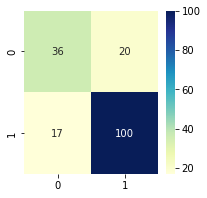

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        56
           1       0.83      0.85      0.84       117

    accuracy                           0.79       173
   macro avg       0.76      0.75      0.75       173
weighted avg       0.78      0.79      0.78       173

------------------------------------------
ROC Curves              = 0.7487789987789988
Precision-Recall Curves = 0.8931500419939727


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)


y_pred_rf = rf.predict(x_test)

print("Training Accuracy :", rf.score(x_train, y_train)*100)
print("Testing Accuracy :", rf.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)
print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

Training Accuracy : 80.52325581395348
Testing Accuracy : 83.23699421965318


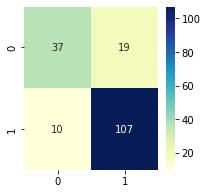

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        56
           1       0.85      0.91      0.88       117

    accuracy                           0.83       173
   macro avg       0.82      0.79      0.80       173
weighted avg       0.83      0.83      0.83       173

------------------------------------------
ROC Curves              = 0.7876221001221001
Precision-Recall Curves = 0.9107698659721781


In [67]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)


y_pred_rf = ada.predict(x_test)

print("Training Accuracy :", ada.score(x_train, y_train)*100)
print("Testing Accuracy :", ada.score(x_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)
print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

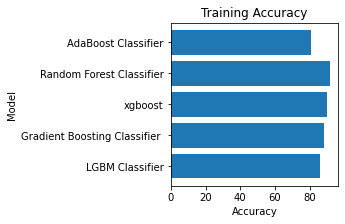

In [68]:
x_axis = ['LGBM Classifier', 'Gradient Boosting Classifier ', 'xgboost','Random Forest Classifier','AdaBoost Classifier']
y_axis = [86,88.2,90.2,91.8,80.5]

plt.barh(x_axis, y_axis)
plt.title('Training Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')

fig = plt.figure(1, [20, 8])
plt.show()

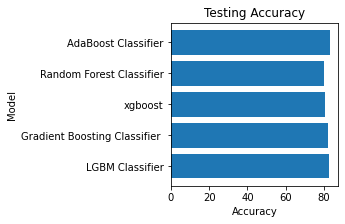

In [69]:
x_axis = ['LGBM Classifier', 'Gradient Boosting Classifier ', 'xgboost','Random Forest Classifier','AdaBoost Classifier']
y_axis = [82.7,82,80.3,79.8,83.2]

plt.barh(x_axis, y_axis)
plt.title('Testing Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')

fig = plt.figure(1, [20, 8])
plt.show()

In [70]:
# pip install lazypredict 

In [71]:
# from lazypredict.Supervised import LazyClassifier

In [72]:
# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True, 
#                      custom_metric=None)
# models, predictions = clf.fit(x_train, x_test, y_train, y_test)
# models